# Stock Market Prediction Project:
### By Anuroop Arya
## Problem Statement: 
Stock Market PredictionAnd Forecasting Using Stacked LSTM

Datasetlinks: : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# Load the dataset
df = pd.read_csv('Stock prize prediction.csv')

In [3]:
# Extract the 'Close' values of the shares and assign an index to each value
df = df.reset_index()['Close']


In [4]:
# Check for missing values
df.isnull().sum()


0

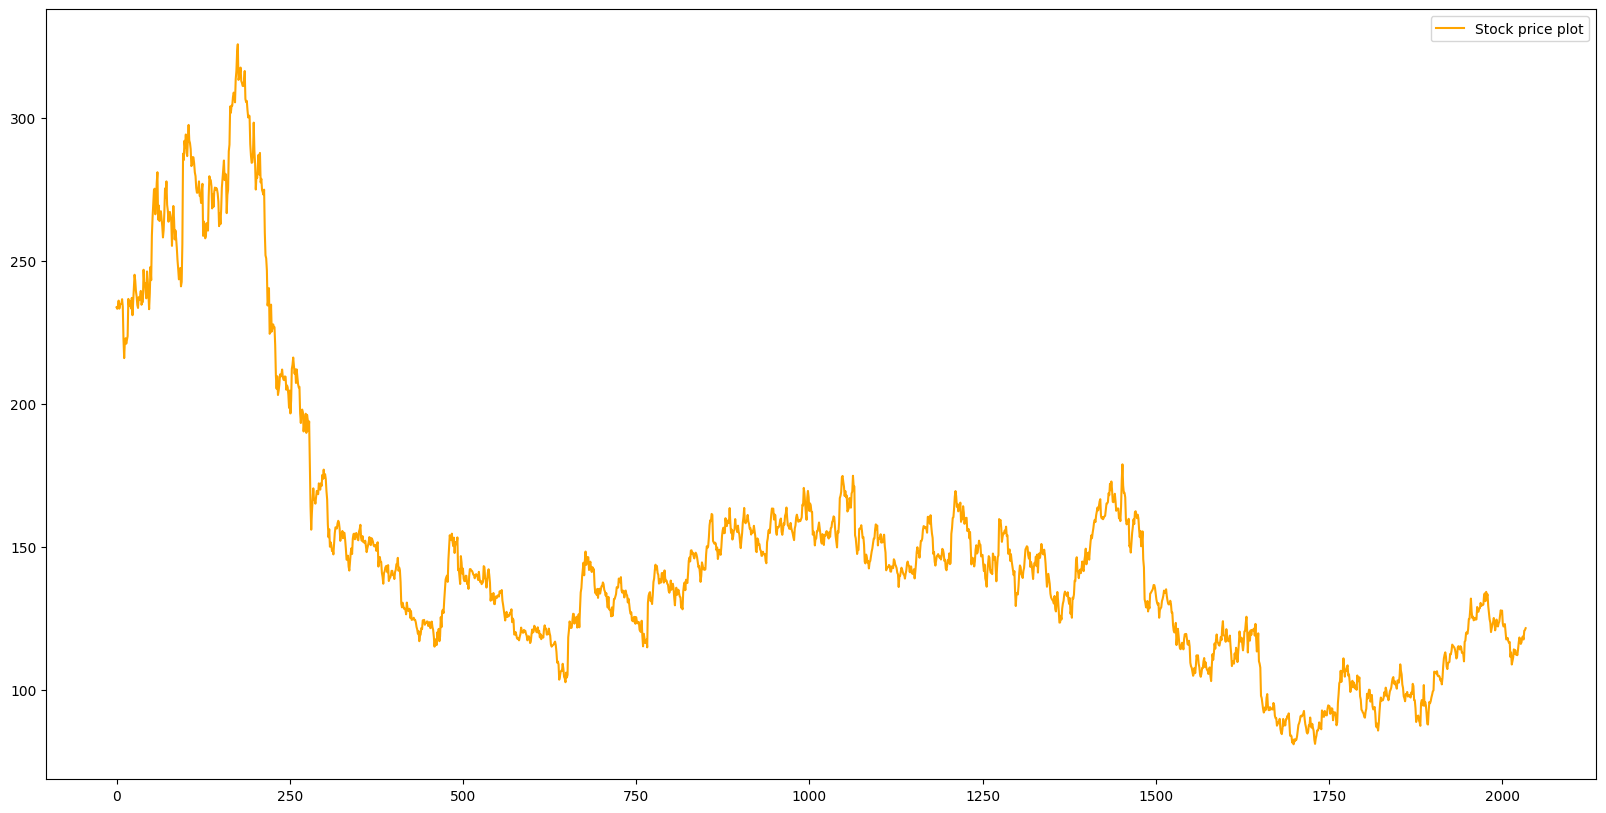

In [5]:

# Plot the stock price data
plt.figure(figsize=(20, 10))
plt.plot(df, color='orange', label='Stock price plot')
plt.legend()
plt.show()

In [6]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(np.array(df).reshape(-1, 1))


In [7]:
# Split the dataset into training and test datasets
training_size = int(len(df) * 0.75)
test_size = len(df) - training_size
train_data, test_data = df[0:training_size, :], df[training_size:len(df), :1]


In [8]:
# Function to create input features and labels
def create_features(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)


In [9]:
# Define the time step
time_step = 100


In [10]:
# Create training features and labels
X_train, y_train = create_features(train_data, time_step)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)


In [11]:
# Create test features and labels
X_test, y_test = create_features(test_data, time_step)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [12]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)


Epoch 1/100
23/23 [==============================] - 48s 915ms/step - loss: 0.0248 - val_loss: 0.0064
Epoch 2/100
23/23 [==============================] - 18s 781ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 3/100
23/23 [==============================] - 12s 519ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 4/100
23/23 [==============================] - 14s 599ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 5/100
23/23 [==============================] - 15s 659ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 6/100
23/23 [==============================] - 12s 543ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 7/100
23/23 [==============================] - 25s 1s/step - loss: 0.0014 - val_loss: 0.0012
Epoch 8/100
23/23 [==============================] - 19s 749ms/step - loss: 0.0011 - val_loss: 7.5103e-04
Epoch 9/100
23/23 [==============================] - 11s 491ms/step - loss: 0.0010 - val_loss: 8.6342e-04
Epoch 10/100
23/23 [==============================] - 13s 576ms/step - loss: 

23/23 [==============================] - 7s 309ms/step - loss: 2.5101e-04 - val_loss: 2.2678e-04
Epoch 76/100
23/23 [==============================] - 7s 310ms/step - loss: 2.3218e-04 - val_loss: 2.4327e-04
Epoch 77/100
23/23 [==============================] - 7s 299ms/step - loss: 2.6705e-04 - val_loss: 2.9007e-04
Epoch 78/100
23/23 [==============================] - 7s 302ms/step - loss: 2.9071e-04 - val_loss: 1.9444e-04
Epoch 79/100
23/23 [==============================] - 8s 336ms/step - loss: 2.3410e-04 - val_loss: 2.0643e-04
Epoch 80/100
23/23 [==============================] - 13s 546ms/step - loss: 2.0719e-04 - val_loss: 2.2493e-04
Epoch 81/100
23/23 [==============================] - 12s 527ms/step - loss: 2.0917e-04 - val_loss: 2.6343e-04
Epoch 82/100
23/23 [==============================] - 15s 615ms/step - loss: 2.0230e-04 - val_loss: 2.0559e-04
Epoch 83/100
23/23 [==============================] - 14s 606ms/step - loss: 2.1174e-04 - val_loss: 1.6010e-04
Epoch 84/100
23/23 

In [14]:
# Generate predictions for training and test sets
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


13/13 [==============================] - 1s 98ms/step


In [15]:
# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [16]:
# Calculate Root Mean Square Error (RMSE)
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Train RMSE: 160.15338331294518
Test RMSE: 104.7425764434297


In [17]:
# Plot the predictions
look_back = 100

testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df) - 1, :] = test_predict


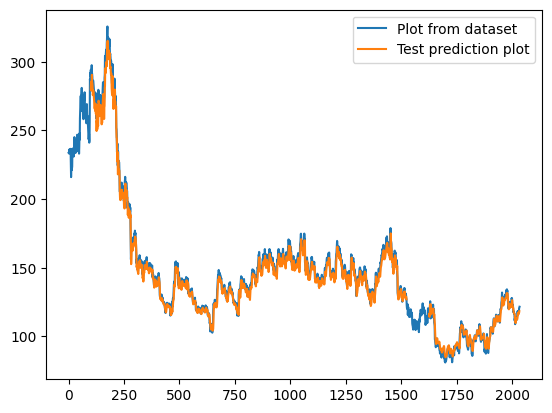

In [18]:
# Plot the original data, trained prediction, and test prediction
plt.plot(scaler.inverse_transform(df), label='Plot from dataset')
plt.plot(testPredictPlot, label='Test prediction plot')
plt.legend()
plt.show()


In [19]:
# Obtain the last 100 days of the dataset
last_100_days = df[-100:]


In [20]:
# Reshape the input for the model prediction
x_input = last_100_days.reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()


In [21]:
# Generate predictions for the next 30 days
lst_output = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1

[0.16052091]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

8 day output [[0.13999985]]
9 day input [0.12867647 0.11846405 0.14644608 0.14808007 0.15910948 0.15992647
 0.15788399 0.16441993 0.17892157 0.17933007 0.19260621 0.20812908
 0.18974673 0.18055556 0.18239379 0.17708333 0.17810458 0.18055556
 0.17810458 0.17851307 0.19607843 0.18913399 0.18954248 0.19403595
 0.19444444 0.20200163 0.19771242 0.19934641 0.19873366 0.1997549
 0.2128268  0.21568627 0.20445261 0.21772876 0.21098856 0.21425654
 0.19750817 0.18811275 0.17851307 0.17381536 0.16033497 0.16564542
 0.17116013 0.17422386 0.18035131 0.17401961 0.16278595 0.16973039
 0.17810458 0.17034314 0.16830065 0.17279412 0.17544935 0.18382353
 0.19138072 0.18913399 0.19097222 0.17238562 0.16830065 0.1693219
 0.17177288 0.16156046 0.14971405 0.1503268  0.15196078 0.14726307
 0.14501634 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768
 0.12377451 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046
 0.12724673 0.13521242 0.14522059 0.15257353 0.14848856 0.14338235
 0.14562908 0.15236928 0.

16 day output [[0.12940055]]
17 day input [0.17892157 0.17933007 0.19260621 0.20812908 0.18974673 0.18055556
 0.18239379 0.17708333 0.17810458 0.18055556 0.17810458 0.17851307
 0.19607843 0.18913399 0.18954248 0.19403595 0.19444444 0.20200163
 0.19771242 0.19934641 0.19873366 0.1997549  0.2128268  0.21568627
 0.20445261 0.21772876 0.21098856 0.21425654 0.19750817 0.18811275
 0.17851307 0.17381536 0.16033497 0.16564542 0.17116013 0.17422386
 0.18035131 0.17401961 0.16278595 0.16973039 0.17810458 0.17034314
 0.16830065 0.17279412 0.17544935 0.18382353 0.19138072 0.18913399
 0.19097222 0.17238562 0.16830065 0.1693219  0.17177288 0.16156046
 0.14971405 0.1503268  0.15196078 0.14726307 0.14501634 0.14603758
 0.12479575 0.13112745 0.11397059 0.1190768  0.12377451 0.13562092
 0.12908497 0.13459967 0.12806373 0.13031046 0.12724673 0.13521242
 0.14522059 0.15257353 0.14848856 0.14338235 0.14562908 0.15236928
 0.15400327 0.14971405 0.1621732  0.16319444 0.16584967 0.16052091
 0.15924852 0.156500

24 day output [[0.12343477]]
25 day input [0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0.13521242 0.14522059 0.15257353
 0.14848856 0.14338235 0.14562908 0.15236928 0.15400327 0.14971405
 0.1621732  0.16319444 0.16584967 0.16052091 0.15924852 0.15650003
 0.15341026 0.15030573 0.14734253 0.14461388 0.14216413 0.13999985
 0.13810225 0.1364383

In [22]:
# Generate arrays for visualization
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)


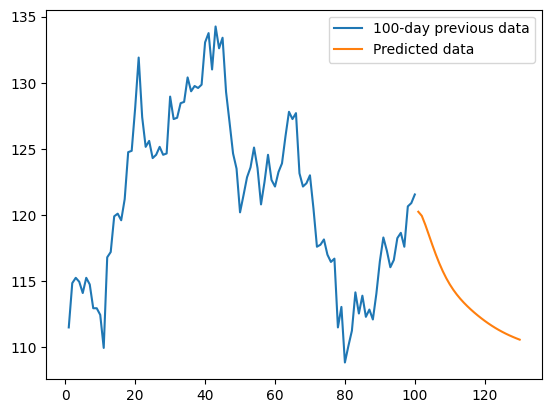

In [23]:
# Plot the graph for the last 100 days
plt.plot(day_new, scaler.inverse_transform(df[-100:]), label='100-day previous data')
plt.plot(day_pred, scaler.inverse_transform(lst_output), label='Predicted data')
plt.legend()
plt.show()

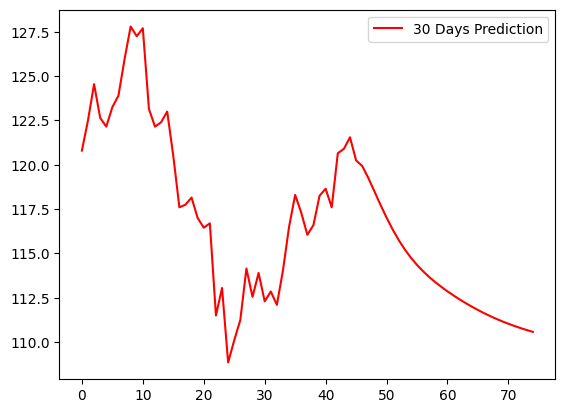

In [24]:
# Plot the graph for the next 30 days
df1 = df.tolist()
df1.extend(lst_output)
plt.plot(scaler.inverse_transform(df1[1990:]), color='red', label='30 Days Prediction')
plt.legend()
plt.show()


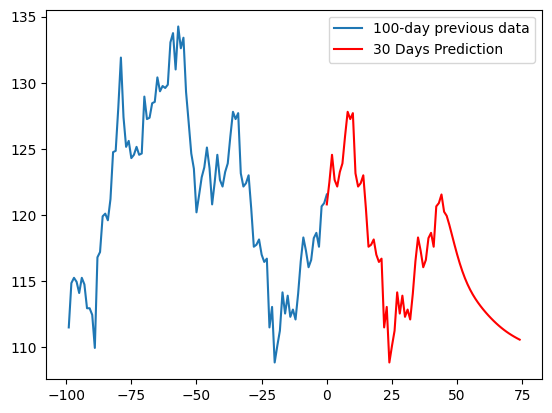

In [25]:
# Plot the graph for the next 130 days
plt.plot(day_new - 100, scaler.inverse_transform(df[-100:]), label='100-day previous data')
plt.plot(scaler.inverse_transform(df1[1990:]), color='red', label='30 Days Prediction')
plt.legend()
plt.show()